# Water Filling Algorithm
## Problem formulation

The water filling algorithm finds the optimal power allocation that maximizes the sum rate over parallel channels assuming that a rate-adaptive radio is used. Concretely, the algorithm solves the optimization problem
$$
\begin{aligned}
& \underset{p_i}{\text{maximize}} && \sum_{i=1}^m \log(1+SNR_i) \\
& \text{subject to} && \sum_{i=1}^m p_i \le \rho \\
&&& p_i \ge 0 \quad \text{for all } i \in \{1, 2, \dots , m\}.
\end{aligned}
$$

Note that the data rate increases logarithmically with power. Thus each unit increase in power yields progressively lower increases in the data rate. This can be seen from the plot below

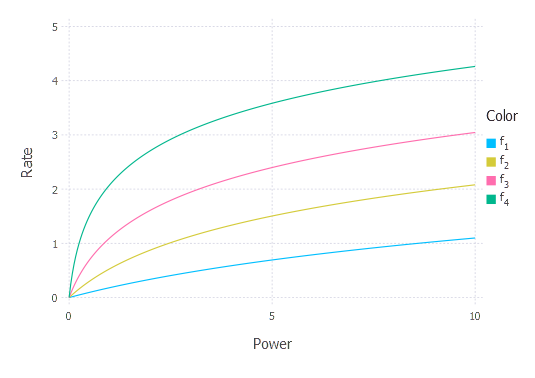

In [8]:
rate1(x) = log(1 + 0.2x)

rate2(x) = log(1 + 0.7x)

rate3(x) = log(1 + 2x)

rate4(x) = log(1 + 7x)

using Gadfly
plot([rate1, rate2, rate3, rate4], 0, 10,
        Guide.xlabel("Power"),
        Guide.ylabel("Rate"))

The SNR (Signal to Noise Ratio) is given by 
$$ SNR_i = \frac{p_i g_i}{n_i}$$

In addition, note that our objective function is increasing with respect to the power levels. Consequently, the optimal power location will always utilize the entire power budget. This leads to the following revised problem, where it is assumed that the gain to noise ratio $\frac{g_i}{n_i}$ is known for each channel.

$$
\begin{aligned}
& \underset{p_i}{\text{minimize}} && -\sum_{i=1}^m \log\left(1+\frac{p_i g_i}{n_i}\right) \\
& \text{subject to} && \sum_{i=1}^m p_i = \rho \\
&&& p_i \ge 0 \quad \text{for all } i \in \{1, 2, \dots , m\}.
\end{aligned}
$$

## Deriving the optimal power allocation

Since our optimization problem is convex, a power allocation that satisfies [the KKT conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) will be optimal. The Lagrangian for this problem is given by
$$
L\left(\vec{p}, \vec{\lambda}, \mu\right) = -\sum_{i=1}^{m} \log\left(1+\frac{p_i g_i}{n_i}\right) + \mu\left(\sum_{i=1}^m p_i - \bar{p}\right) - \sum_{i=1}^m \lambda_i p_i.
$$
Thus, a feasible $\vec{p}$ will be optimal if we can find $\vec{\lambda}$ and $\mu$ such that
$$\lambda_i \ge 0, \quad \lambda_i p_i = 0, \quad \frac{\partial L\left(\vec{p}, \vec{\lambda}, \mu\right)}{\partial p_i} = 0 \quad \text{for all } i \in \{1, 2, \dots , m\}.$$
Expanding the requirement on the partial derivative, we get
$$
\begin{align}
\frac{\partial L\left(\vec{p}, \vec{\lambda}, \mu\right)}{\partial p_i}
 &= -\frac{g_i/n_i}{\left(1+p_i g_i/n_i\right)} + \mu - \lambda_i \\
 &= 0.
\end{align}
$$
Thus,
$$
\begin{align}
\mu &= \frac{g_i/n_i}{\left(1+p_i g_i/n_i\right)} + \lambda_i \\
    &= \frac{1}{\left(n_i/g_i +p_i\right)} + \lambda_i.
\end{align}
$$

If $\mu < g_i/n_i$, then it must be the case that $\lambda_i = 0$. Consequently we have,
$$ p_i = \frac{1}{\mu} - \frac{n_i}{g_i}.$$

If $\mu \ge g_i/n_i$, then it must be the case that $p_i = 0$. Consequently we have,
$$ \lambda_i = \mu - \frac{g_i}{n_i}.$$

To determine $\mu$ we use the constraint that we must use up our entire power budget. This constraint yields,
$$
\sum_{i=1}^{m} \max\left\{ 0, \frac{1}{\mu} - \frac{n_i}{g_i} \right\} =  \rho.
$$

## Illustration

We can imagine each channel to be represented by a vertical bar, the height of which is given by the channel's noise to gain ratio. Flooding the resultant area with $\bar{p}$ amount of water would result in a settled water level of $\frac{1}{\mu}$.

In [66]:
# Enter the noise to gain ratios here
ngr = rand(30)*3;

In [67]:
# Enter the total power budget here
ρ = 15

15

In [68]:
# Infer the number of channels from the entered noise to gain ratios
m = length(ngr)

30

In [69]:
function H2Olevel(r)
    if length(r) == 0
        ρ/length(ngr)
    elseif sum(maximum(r) - r) <= ρ
        maximum(r) + (ρ - sum(maximum(r) - r))/length(r)
    else
        H2Olevel(r[r .< maximum(r)])
    end
end
waterlevel = H2Olevel(ngr)

1.6146422361357733

In [72]:
p = waterlevel - ngr;
p = [max(0, pi) for pi in p ];

In [53]:
# Floats can be imprecise, so test using ≈ (approx)
using Base.Test
@test sum(p) ≈ ρ

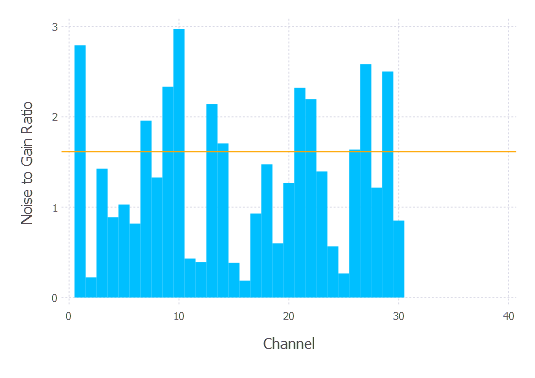

In [74]:
plot(layer(yintercept=[waterlevel], Geom.hline(color=colorant"orange")),
     layer(y=ngr, Geom.bar),
     Guide.XLabel("Channel"),
     Guide.YLabel("Noise to Gain Ratio")
)